# Jonathan Halverson
# Sunday, January 7, 2018
# Part 1: Detecting cluster size in an image

In [1]:
import numpy as np
import tensorflow as tf
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('halverson')

### Circular clusters

In [2]:
def make_images(num_images):
     np.random.seed(12345)
     pixels_per_dim = 400
     pmin = 50
     pmax = 350
     radius = 20.0
     thickness_sq = 500
     for image in xrange(0, num_images + 0):
          xctrs = []
          yctrs = []
          
          A = np.zeros((pixels_per_dim, pixels_per_dim), dtype=np.float32)
          # set first circle
          ic0 = np.random.randint(pmin+40, pmax-40)
          jc0 = np.random.randint(pmin+40, pmax-40)
          xctrs.append(ic0)
          yctrs.append(jc0)
          # get random direction
          theta = 2.0 * np.pi * np.random.random()
          xdisp = 2.6 * radius * np.cos(theta)
          ydisp = 2.6 * radius * np.sin(theta)
          # randomize the four directions
          disp = [(xdisp, ydisp), (-xdisp, -ydisp), (-ydisp, xdisp), (ydisp, -xdisp)]
          np.random.shuffle(disp)
          num_contacts = np.random.choice([0, 1, 2, 3, 4])
          for i in xrange(num_contacts):  
               ic1 = ic0 + disp[i][0]
               jc1 = jc0 + disp[i][1]
               xctrs.append(ic1)
               yctrs.append(jc1)

          # add single, free circles
          num_circles = np.random.choice([7, 8, 9, 10])
          for circle in xrange(num_circles - num_contacts - 1):
               overlap = True
               ct = 0
               while (ct < 100 and overlap):
                    xtmp = np.random.randint(pmin, pmax)
                    ytmp = np.random.randint(pmin, pmax)
                    dsq_min = 1e6
                    for xc, yc in zip(xctrs, yctrs):
                         dsq = (xc - xtmp)**2 + (yc - ytmp)**2
                         if (dsq < dsq_min): dsq_min = dsq
                    if (dsq_min > (3.1 * radius)**2):
                         overlap = False
                         xctrs.append(xtmp)
                         yctrs.append(ytmp)
                         
          # given set of centers, draw circles
          for xc, yc in zip(xctrs, yctrs):
               for i in xrange(pixels_per_dim):
                    for j in xrange(pixels_per_dim):
                         rsq = (i - xc)**2 + (j - yc)**2
                         if (rsq > radius**2) and (rsq < radius**2 + thickness_sq):
                              A[i, j] = 1.0
                              
          # add noise, scale max to 255 and write to file
          max_pixel_value = 1.0 # make 2 if noise is added
          A += 0 * np.random.rand(pixels_per_dim, pixels_per_dim)
          A *= 255.0 / max_pixel_value
          fname = str(image) + '_N' + str(num_circles) + '_C' + str(num_contacts) + '_.png'
          imageio.imwrite('cluster_images_no_noise/image' + fname, A.astype(np.uint8))
          if (image % 100 == 0): print image
     return None

In [3]:
make_images(2000)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


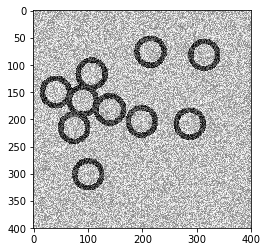

In [25]:
plt.imshow(plt.imread('cluster_images/image12_N10_C4_.png'), cmap='binary')

### Concentric circles

In [ ]:
def make_concentric(num_images):
     np.random.seed(12345)
     pixels_per_dim = 400
     thickness_sq = 500
     for image in xrange(num_images):
          xctrs = []
          yctrs = []
          radius = []
          
          A = np.zeros((pixels_per_dim, pixels_per_dim), dtype=np.float32)
          # set first circle
          ic0 = np.random.randint(150, 250)
          jc0 = np.random.randint(150, 250)
          xctrs.append(ic0)
          yctrs.append(jc0)
          xctrs.append(ic0)
          yctrs.append(jc0)
          xctrs.append(ic0)
          yctrs.append(jc0)
          xctrs.append(ic0)
          yctrs.append(jc0)
          radius.append(20.0)
          radius.append(60.0)
          radius.append(100.0)
          radius.append(140.0)

          # given set of centers, draw circles
          num_circles = np.random.choice([0, 1, 2, 3, 4])
          for xc, yc, r in zip(xctrs, yctrs, radius)[:num_circles]:
               for i in xrange(pixels_per_dim):
                    for j in xrange(pixels_per_dim):
                         rsq = (i - xc)**2 + (j - yc)**2
                         if (rsq > r**2) and (rsq < r**2 + thickness_sq * r / 20.0):
                              A[i, j] = 1.0
                              
          # add noise, scale max to 255 and write to file
          max_pixel_value = 2.0
          A += np.random.rand(pixels_per_dim, pixels_per_dim)
          A *= 255.0 / max_pixel_value
          fname = str(image) + '_C' + str(num_circles) + '_.png'
          imageio.imwrite('cluster_images_concentric/image' + fname, A.astype(np.uint8))
          if (image % 100 == 0): print image
     return None

In [ ]:
#make_concentric(500)

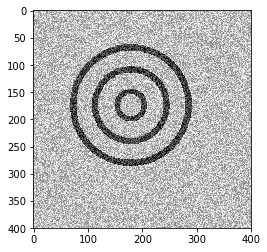

In [24]:
plt.imshow(plt.imread('cluster_images_concentric/image19_C3_.png'), cmap='binary')